In [1]:
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

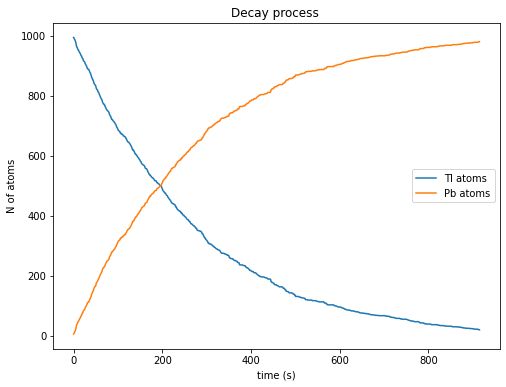

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#initializing parameters for simulation
NTl = 1000 #N
NPb = 0 #N
tau = 3.052 * 60 #s
time_step = 1
t_max = 5 * tau
time = np.arange(0, t_max , time_step) #[s]

#making loops in time and atoms in order to simulate the decays 
NTl_hist = []
NPb_hist = []

for t in time:

    #we define the decay probability for each timestep and then 
    #we can extract by uniform distribution values between [0,1]
    #if unif > p the atom decay 
    r = np.random.uniform(0, 1, NTl)
    p_t = 1 - np.exp2(-time_step / tau)
    decay_count = 0

    for n in range(NTl):
        if r[n] < p_t:
            decay_count += 1
    
    #let's store the results for next plot
    NTl -= decay_count
    NPb += decay_count
    NTl_hist.append(NTl)
    NPb_hist.append(NPb)

#plotting 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.plot(time, NTl_hist, label = 'Tl atoms')
ax.plot(time, NPb_hist, label = 'Pb atoms')
ax.set_title('Decay process ')
ax.set_xlabel('time (s)')
ax.set_ylabel('N of atoms')
ax.legend()
plt.show()




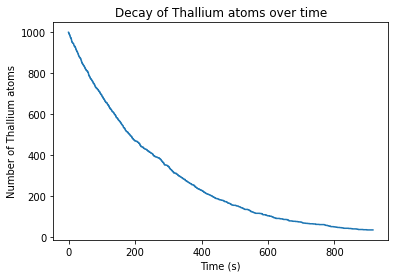

In [3]:
half_life = 3.052 * 60  # half-life in seconds
N_atoms = 1000

times = np.linspace(0, 5 * half_life, 10000)  # time range, for example up to 10 half-lives

# Generating decay times with base 2 exponential distribution
decay_times = -tau * np.log2(1 - np.random.uniform(0, 1, N_atoms))
decay_times.sort()

# Counting remaining atoms
remaining_atoms = np.array([np.sum(decay_times > t) for t in times])

# Plotting
plt.plot(times, remaining_atoms)
plt.xlabel('Time (s)')
plt.ylabel('Number of Thallium atoms')
plt.title('Decay of Thallium atoms over time')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
import scipy.constants as const

#defining constants 
N = 10**(6)
a_0 = const.physical_constants['Bohr radius'][0] 
Z = 79
e = const.e 
pi = np.pi
eps = const.epsilon_0
E = 7.7 * 10**(6) * e

#defining parameters for the alpha shower 
sigma = a_0/100
cov = np.array([[sigma**2,0],[0,sigma**2]])
beam = np.random.multivariate_normal(mean=[0,0], cov=cov, size=N)
b = np.sqrt(beam[:,0]**2+beam[:,1]**2)





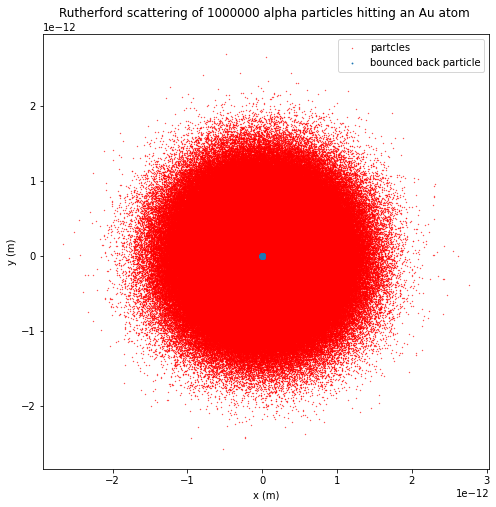

In [5]:
def montecarlo_scattering():
    
    tan_half_theta = []

    for part in b:
        tan_half_theta.append((Z*(e**2))/(2*pi*eps*E*part))
    return 2*np.arctan(tan_half_theta)

simulation = montecarlo_scattering()


mask_back = simulation > pi/2
mask_pass = simulation < pi/2
bounce_back_part = beam[mask_back]
pass_part = beam[mask_pass]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(pass_part[:,0], pass_part[:,1], color = 'r', s = 0.1, label = 'partcles')  
ax.scatter(bounce_back_part[:,0], bounce_back_part[:,1], s = 0.7, label = 'bounced back particle')
ax.set_title(f'Rutherford scattering of {N} alpha particles hitting an Au atom ')
ax.set_xlabel('x (m)')  
ax.set_ylabel('y (m)')  
ax.legend()

 

    

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [6]:
def f(x):
   return np.sin(1/(x*(2-x)))**2

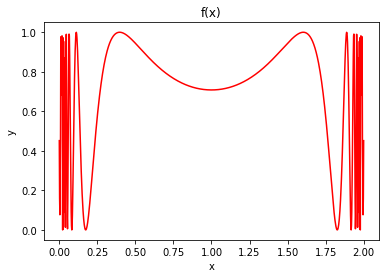

Montecarlo hit and miss integration 1.4508 +/- 0.0009
Monte carlo mean value integration 1.4519 +/- 0.0005


In [7]:
x=np.linspace(0.001,1.999,1000)

#plotting the funcion
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('f(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x,f(x),'r-')
plt.show()

# Monte Carlo Hit-Miss integration
N=1000000
count=0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N

#computing the probability p
p = count/N 
#computing the error for the binomial dist
std = np.sqrt(N*p*(1-p))/N
print('Montecarlo hit and miss integration', round(I,4) , '+/-', round(2*std,4))


#montecarlo mean value integration
x = np.linspace(0.001, 1.999, N)
I = 2*np.sum(f(x))/N
std = np.sqrt((np.sum(f(x)**2)/N-np.sum(f(x)/N)**2)/N)
print('Monte carlo mean value integration', round(I,4) ,'+/-', round(2*std,4))


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
#defining the function  square sum
def f(x):                  
    sq_sum = np.sum(x**2, axis=0)      
    return np.array([1 if (s<=1) else 0 for s in sq_sum]) 

# 2D hit and miss
N = 1000000
#hitting square
x = np.random.uniform(-1, 1, (2, N))
#montecarlo h-m : I = Area * count/N
I = 2**2 * np.sum(f(x))/N
#binomial sqrt(npq)
p = np.sum(f(x))/N
err_I = 2*np.sqrt(N*p*(1-p))/N
print(f"I_2D = {round(I,4)} +- {round(err_I,4)}")

# 10D ... same 
x = np.random.uniform(-1, 1, (10, N))
I = 2**10*np.sum(f(x))/N
p = np.sum(f(x))/N
err_I = 2*np.sqrt(N*p*(1-p))/N
print(f"I_10D = {round(I,4)} +- {round(err_I,4)}")

I_2D = 3.1406 +- 0.0008
I_10D = 2.5846 +- 0.0001


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [12]:
#defining weight function
def w(x):
    return 1/(np.sqrt(x))

#defining inverse func of w
def inv_w(x):
    return x**2

#defining f to be integrated 
def f(x):
    return x**-0.5/(np.exp(x)+1)

N = 10**(6)
x = inv_w(np.random.uniform(0,1,N))
#I = int(w(x)) * sum(f(x)/w(x)) / N ==> 2 * sum(f(x)/w(x)) / N 
I = 2 * np.sum(f(x)/w(x)) / N
print(f"I = {round(I,3)}")

I = 0.325
